# Subsampling as an alternative to normalisation

In [1]:
import scanpy as sc
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Import the PBMC 3k dataset again:

In [2]:
adata = sc.read_h5ad("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/pbmc3k/pbmc3k_raw.h5ad")

Add the easy QC metrics:

In [3]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [4]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

<Axes: >

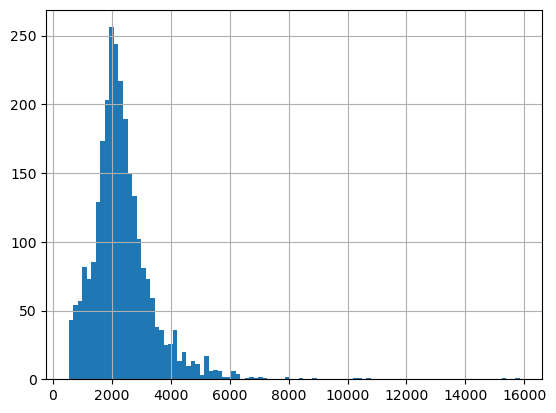

In [5]:
adata.obs["total_counts"].hist(bins=100)

In [19]:
subsampled_min = sc.pp.downsample_counts(adata, counts_per_cell=548, copy=True)
sc.pp.log1p(subsampled_min)

In [20]:
# total_counts_after_min_subsampling = np.sum(subsampled_min.X, axis=1)
# total_counts_after_min_subsampling = np.array(total_counts_after_min_subsampling).flatten()
# fig, ax = plt.subplots()
# ax.hist(total_counts_after_min_subsampling);

In [21]:
sc.pp.neighbors(subsampled_min, use_rep="X")
sc.tl.umap(subsampled_min)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


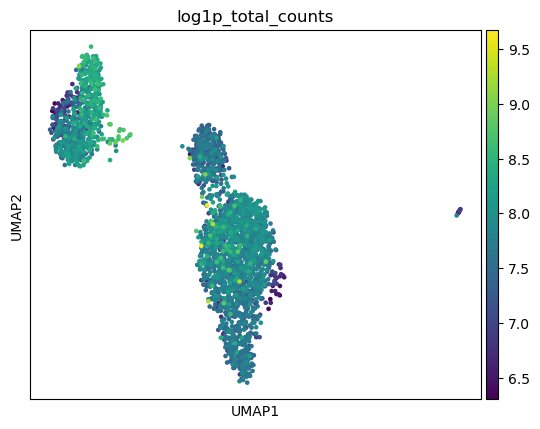

In [22]:
sc.pl.umap(subsampled_min, color="log1p_total_counts")

## Filter small cells and subsample to a larger read count

In [26]:
subsampled_2000 = sc.pp.downsample_counts(adata, counts_per_cell=2000, copy=True)

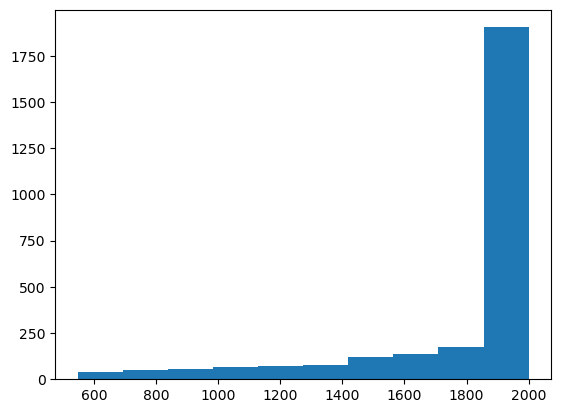

In [27]:
total_counts_after_2000_subsampling = np.sum(subsampled_2000.X, axis=1)
total_counts_after_2000_subsampling = np.array(total_counts_after_2000_subsampling).flatten()
fig, ax = plt.subplots()
ax.hist(total_counts_after_2000_subsampling);

In [30]:
sc.pp.log1p(subsampled_2000)

In [31]:
sc.pp.neighbors(subsampled_2000, use_rep="X")
sc.tl.umap(subsampled_2000)

/Users/npapadop/mambaforge/envs/ascc23/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:163: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = copy(get_cmap(cmap))


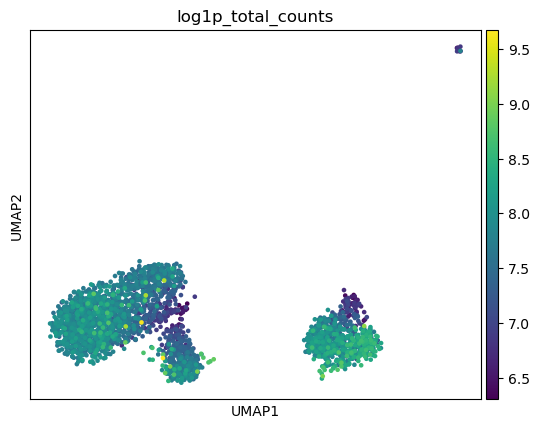

In [32]:
sc.pl.umap(subsampled_2000, color="log1p_total_counts")

In [34]:
import pandas as pd

In [36]:
annot = pd.read_csv("/Users/npapadop/Documents/teaching/2023/advanced_scRNAseq/data/pbmc3k/pbmc3k_annot.csv")
annot.set_index("index", inplace=True)
adata.obs = adata.obs.join(annot)

In [38]:
adata.obs

,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes
index,,,,,,,,
AAACATACAACCAC-1,781,6.661855,2421.0,7.792349,47.748864,63.279637,74.969021,88.393226
AAACATTGAGCTAC-1,1352,7.210080,4903.0,8.497807,45.502753,61.023863,71.813176,82.622884
AAACATTGATCAGC-1,1131,7.031741,3149.0,8.055158,41.314703,53.794856,65.449349,79.961893
AAACCGTGCTTCCG-1,960,6.867974,2639.0,7.878534,39.029936,52.898825,66.691929,82.569155
AAACCGTGTATGCG-1,522,6.259581,981.0,6.889591,44.852192,55.657492,67.176351,97.757390
...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,7.052721,3461.0,8.149602,39.237215,52.528171,65.761341,81.074834
TTTCTACTGAGGCA-1,1227,7.113142,3447.0,8.145550,37.278793,51.900203,63.881636,78.909196
TTTCTACTTCCTCG-1,622,6.434547,1684.0,7.429521,45.783848,61.638955,74.940618,92.755344


In [49]:
adata.obs.columns

Index(['n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts',
       'log1p_total_counts', 'pct_counts_in_top_50_genes',
       'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes',
       'pct_counts_in_top_500_genes', 'celltype'],
      dtype='object')